In [1]:
import pandas as pd
file_path = '/Users/arsenegery/Desktop/Cleaned_Data_Ritual_M1/Cleaned_Data/Cleaned_Data_HN_Master.xlsx'
data = pd.read_excel(file_path)

In [2]:
data = data.drop(columns=['Society'])

In [3]:
specific_value = "19th Century Yakut practice (Jochelson. Waldemar. 1885-1937 Kumiss festivals of the Yakut and the decoration of Kumiss vessels. 263)"
general_value = "19th Century Yakut practice"
data['Religious tradition'] = data['Religious tradition'].replace(specific_value, general_value)
data = data.replace(334, 3.34)
data

,Religious tradition,Dancing or repetitive rhythmic movement,Singing and (repetitive) rhythmic vocalization,Use of percussion instruments,Use of other instruments,"Shouting, screaming and other non-rhythmic vocalizations","Music and/or dance that evinces excitement (e.g. through high volume, energetic display, etc.)","Music and/or dance that evinces sorrow/nostalgia (e.g. through sad lyrics, poignant motifs, etc.)",Music and/or dance that involves large-scale concerted action,Marching/ procession/ Proambulation,...,Size of population that shares identifiable beliefs and practices,Is tradition mixed?,Perception of religious leaders by laity,Degree of hierarchy in religious roles,Leaders derive moral authority as embodiments of divine,Influence of classical 'world' religions,Has identification with traditional religion ended?,Proportion of population identifying with classical religion,Ritual duration category,Typical frequency of participation for average participant
0,Blackfoot religion,0,0,0,0,0,0,0,0,0,...,2,2,0,4,0,6,0,2,1.0,4
1,Blackfoot religion,0,1,0,0,0,0,0,0,0,...,2,2,0,4,0,6,0,2,3.0,6
2,Blackfoot religion,0,1,0,0,0,0,0,0,1,...,2,2,0,4,0,6,0,2,2.0,5
3,Blackfoot religion,0,1,0,0,0,0,0,0,0,...,2,2,0,4,0,6,0,2,2.0,4
4,Blackfoot religion,0,0,0,0,1,0,0,0,0,...,2,2,0,4,0,6,0,2,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,Mun religion,0,1,1,0,0,0,0,0,1,...,0,0,0,4,0,6,0,3,2.0,5
641,Mun religion,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,6,0,3,2.0,5
642,Islam,0,0,0,0,0,0,0,0,0,...,4,0,0,3,0,6,0,5,1.0,6
643,Islam,1,1,0,0,0,0,0,0,1,...,4,0,0,3,0,6,0,5,2.0,6


In [4]:
# Aggregate the data by 'Religious tradition' using the median
data_aggregated = data.groupby('Religious tradition').median()

# Display the aggregated data to verify
data.head()

,Religious tradition,Dancing or repetitive rhythmic movement,Singing and (repetitive) rhythmic vocalization,Use of percussion instruments,Use of other instruments,"Shouting, screaming and other non-rhythmic vocalizations","Music and/or dance that evinces excitement (e.g. through high volume, energetic display, etc.)","Music and/or dance that evinces sorrow/nostalgia (e.g. through sad lyrics, poignant motifs, etc.)",Music and/or dance that involves large-scale concerted action,Marching/ procession/ Proambulation,...,Size of population that shares identifiable beliefs and practices,Is tradition mixed?,Perception of religious leaders by laity,Degree of hierarchy in religious roles,Leaders derive moral authority as embodiments of divine,Influence of classical 'world' religions,Has identification with traditional religion ended?,Proportion of population identifying with classical religion,Ritual duration category,Typical frequency of participation for average participant
0,Blackfoot religion,0,0,0,0,0,0,0,0,0,...,2,2,0,4,0,6,0,2,1.0,4
1,Blackfoot religion,0,1,0,0,0,0,0,0,0,...,2,2,0,4,0,6,0,2,3.0,6
2,Blackfoot religion,0,1,0,0,0,0,0,0,1,...,2,2,0,4,0,6,0,2,2.0,5
3,Blackfoot religion,0,1,0,0,0,0,0,0,0,...,2,2,0,4,0,6,0,2,2.0,4
4,Blackfoot religion,0,0,0,0,1,0,0,0,0,...,2,2,0,4,0,6,0,2,2.0,5


In [5]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Computing my cosine similarity matrix from the aggregated data
cosine_sim_matrix = cosine_similarity(data_aggregated)

# Converting the cosine similarity matrix into a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=data_aggregated.index, columns=data_aggregated.index)

cosine_sim_df.iloc[:10, :10]

Religious tradition,19th Century Yakut practice,African cultism,Andaman religion,Animistic ritual,Anti-witchcraft shrine-related cults,Aranda religion,Ayakka Secret Society,Aymara religion,Azande religion,Banyoro religion
Religious tradition,,,,,,,,,,
19th Century Yakut practice,1.000000,0.706414,0.827012,0.823161,0.652490,0.645412,0.779138,0.869447,0.818781,0.767421
African cultism,0.706414,1.000000,0.843062,0.748726,0.835323,0.659779,0.780811,0.749717,0.803400,0.734765
Andaman religion,0.827012,0.843062,1.000000,0.812754,0.771226,0.844572,0.862573,0.803659,0.887946,0.739944
Animistic ritual,0.823161,0.748726,0.812754,1.000000,0.782000,0.715042,0.896619,0.861673,0.848868,0.916308
Anti-witchcraft shrine-related cults,0.652490,0.835323,0.771226,0.782000,1.000000,0.601581,0.858713,0.655353,0.760942,0.787334
Aranda religion,0.645412,0.659779,0.844572,0.715042,0.601581,1.000000,0.743321,0.697072,0.795976,0.672857
Ayakka Secret Society,0.779138,0.780811,0.862573,0.896619,0.858713,0.743321,1.000000,0.763440,0.867832,0.862836
Aymara religion,0.869447,0.749717,0.803659,0.861673,0.655353,0.697072,0.763440,1.000000,0.896185,0.847238
Azande religion,0.818781,0.803400,0.887946,0.848868,0.760942,0.795976,0.867832,0.896185,1.000000,0.836250


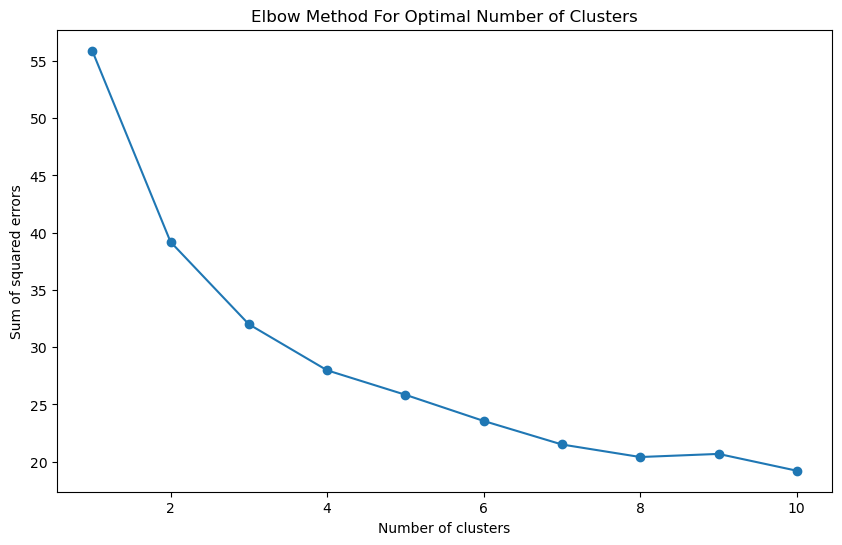

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(cosine_sim_matrix)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

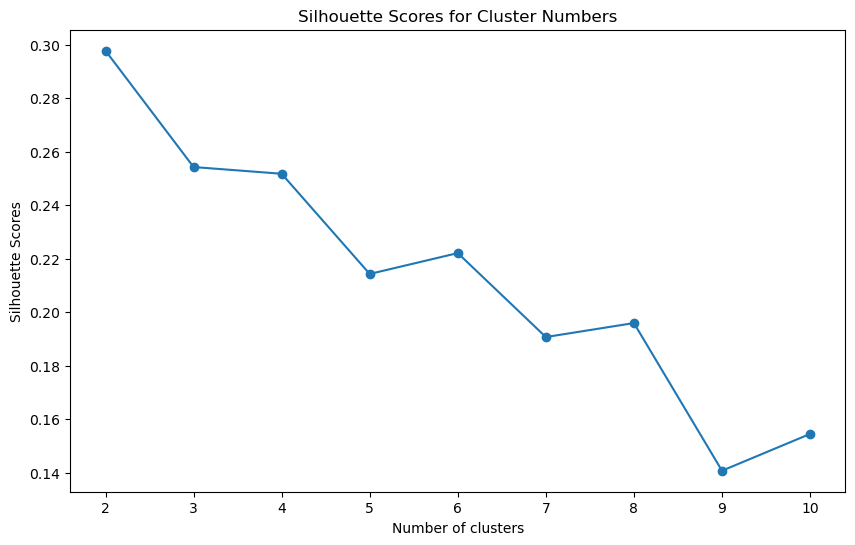

In [8]:
# Silhouette scores for different numbers of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(cosine_sim_matrix)
    score = silhouette_score(cosine_sim_matrix, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Cluster Numbers')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

In [9]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=6)

# Fit PCA on my cosine similarity matrix
pca.fit(cosine_sim_matrix)

# Calculating individual explained variance
individual_explained_variance = pca.explained_variance_ratio_

# Calculating cumulative explained variance
cumulative_explained_variance = np.cumsum(individual_explained_variance)

# Preparing a DataFrame to display results
pca_results = pd.DataFrame({
    'Principal Component': np.arange(1, len(individual_explained_variance)+1),
    'Explained Variance': individual_explained_variance,
    'Cumulative Explained Variance': cumulative_explained_variance
})

pca_results

,Principal Component,Explained Variance,Cumulative Explained Variance
0,1,0.416921,0.416921
1,2,0.214314,0.631235
2,3,0.131036,0.762271
3,4,0.074471,0.836742
4,5,0.056946,0.893688
5,6,0.047264,0.940952


In [10]:
# Loadings from PCA
loadings = pca.components_.T
loading_df = pd.DataFrame(loadings, columns=['PC{}'.format(i) for i in range(1, 7)], index=cosine_sim_df.index)
loading_df.to_excel("/Users/arsenegery/Desktop/Cleaned_Data_Ritual_M1/Tables_HN_Masters/Best_Tables/PCA_Loadings.xlsx", index=True)
loading_df

,PC1,PC2,PC3,PC4,PC5,PC6
Religious tradition,,,,,,
19th Century Yakut practice,-0.101970,-0.086040,-0.178495,0.063561,-0.022278,0.081270
African cultism,-0.128171,0.052184,0.086586,-0.132572,-0.155675,0.196014
Andaman religion,-0.156681,0.087976,-0.079858,-0.147113,-0.022592,0.014577
Animistic ritual,-0.084109,-0.108438,0.022573,0.005897,0.002192,-0.124938
Anti-witchcraft shrine-related cults,-0.062601,-0.022145,0.174296,-0.141544,-0.112608,0.029526
...,...,...,...,...,...,...
Tukano religion,-0.168240,0.071081,0.035929,-0.078141,-0.005402,-0.034430
Tzeltal religion,-0.148707,-0.058017,0.019383,0.070206,-0.027265,0.172706
Warao religion,-0.106536,-0.011899,0.179099,-0.035760,0.092621,0.215754


In [11]:
loading_df = pd.read_excel("/Users/arsenegery/Desktop/Cleaned_Data_Ritual_M1/Tables_HN_Masters/Best_Tables/PCA_Loadings.xlsx",
                           sheet_name='Sheet1')
loading_df.head()

,Religious tradition,PC1,PC2,PC3,PC4,PC5,PC6
0,19th Century Yakut practice,-0.101970,-0.086040,-0.178495,0.063561,-0.022278,0.081270
1,African cultism,-0.128171,0.052184,0.086586,-0.132572,-0.155675,0.196014
2,Andaman religion,-0.156681,0.087976,-0.079858,-0.147113,-0.022592,0.014577
3,Animistic ritual,-0.084109,-0.108438,0.022573,0.005897,0.002192,-0.124938
4,Anti-witchcraft shrine-related cults,-0.062601,-0.022145,0.174296,-0.141544,-0.112608,0.029526


In [12]:
summary_stats = loading_df.iloc[:, 1:].describe()
summary_stats

,PC1,PC2,PC3,PC4,PC5,PC6
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,-0.073713,-0.064585,-0.001990,-0.045523,0.007991,0.003126
std,0.080927,0.088469,0.109746,0.099754,0.109470,0.109719
min,-0.215929,-0.260623,-0.256341,-0.264448,-0.251260,-0.230697
25%,-0.130721,-0.123663,-0.079926,-0.132877,-0.067631,-0.061767
50%,-0.087904,-0.073145,-0.001236,-0.031336,0.001576,0.004020
75%,-0.031398,-0.004720,0.074665,0.026580,0.063422,0.061694
max,0.147730,0.168696,0.262981,0.122465,0.350254,0.264624


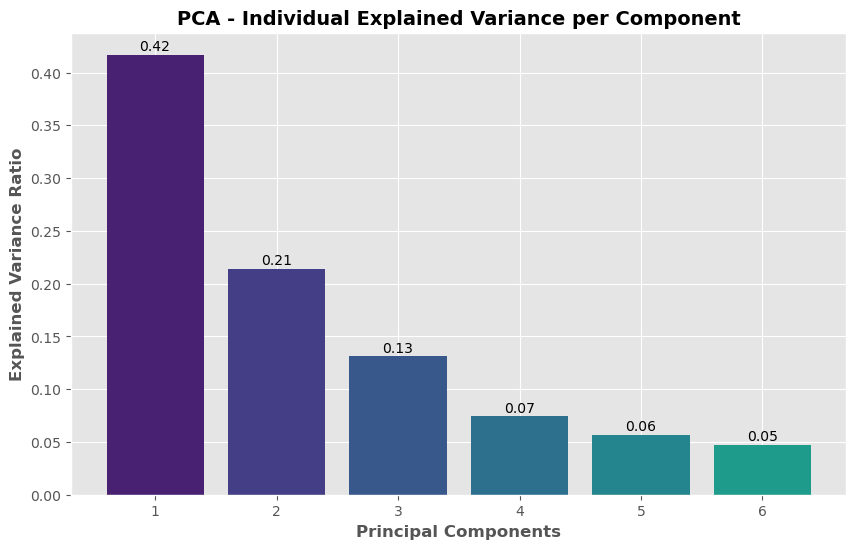

In [24]:
import seaborn as sns  # For a nicer color palette

# Styling for the plot using Matplotlib built-in styles
plt.style.use('ggplot')

# Plotting the individual explained variance
plt.figure(figsize=(10, 6))  # Slightly larger figure for better clarity
bars = plt.bar(pca_results['Principal Component'], pca_results['Explained Variance'],
               color=sns.color_palette("viridis", n_colors=10))  # A visually pleasing color palette

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.2f}',
             va='bottom', ha='center', fontsize=10, color='black')

# Setting labels and title with enhanced formatting + show plot
plt.xlabel('Principal Components', fontsize=12, fontweight='bold')
plt.ylabel('Explained Variance Ratio', fontsize=12, fontweight='bold')
plt.title('PCA - Individual Explained Variance per Component', fontsize=14, fontweight='bold')
plt.xticks(pca_results['Principal Component'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

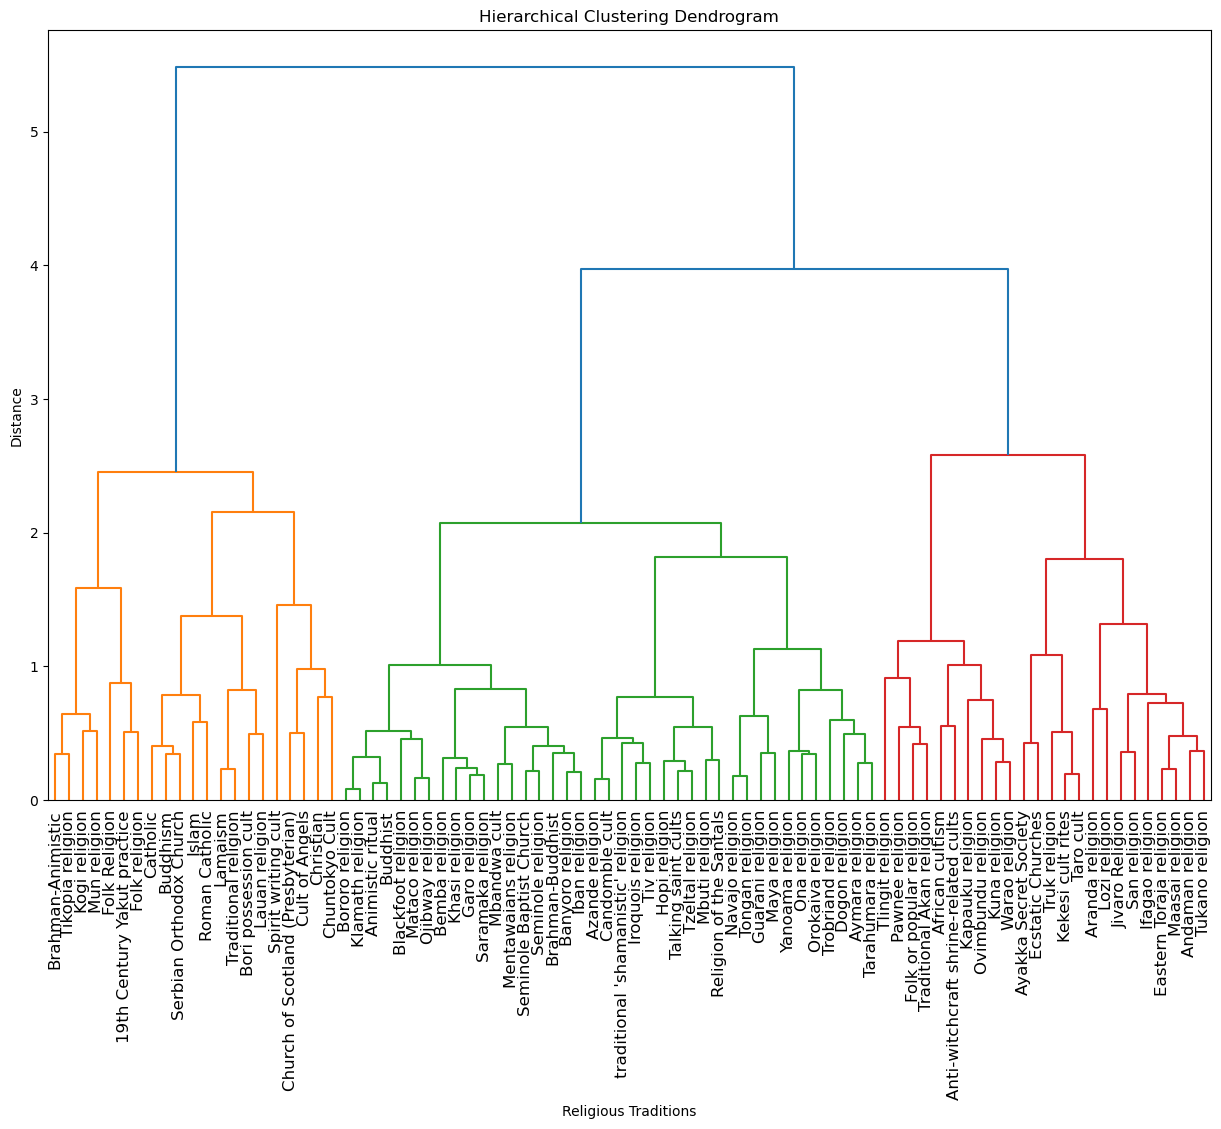

In [13]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Transforming data using the selected number of PCA components
pca_transformed = pca.transform(cosine_sim_matrix)

# Performing hierarchical clustering using the 'ward' linkage method
linked = linkage(pca_transformed, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked, labels=data_aggregated.index.tolist(), leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Religious Traditions')
plt.ylabel('Distance')
plt.show()

In [14]:
# List of available variables for statistical testing (ANOVA next)
print(data_aggregated.columns)

Index(['Dancing or repetitive rhythmic movement',
       'Singing and (repetitive) rhythmic vocalization',
       'Use of percussion instruments', 'Use of other instruments',
       'Shouting, screaming and other non-rhythmic vocalizations',
       'Music and/or dance that evinces excitement (e.g. through high volume, energetic display, etc.)',
       'Music and/or dance that evinces sorrow/nostalgia (e.g. through sad lyrics, poignant motifs, etc.)',
       'Music and/or dance that involves large-scale concerted action',
       'Marching/ procession/ Proambulation',
       'Loud bangs: firing of guns, fireworks',
       'Bowing, kneeling or prostration', 'Hair cutting or shaving', 'Washing',
       'Participants rubbed or massaged',
       'Sprinkling or blowing of liquids or small particles',
       'Fumigation, smoke purification', 'Interdiction against use of hands',
       'Spitting on patient', 'Intake of hallucinogenic drugs',
       'Intake of sedatives', 'Intake of alcohol', 'e

In [15]:
from scipy.cluster.hierarchy import fcluster
from scipy.stats import f_oneway

# Setting cutoff distance
cutoff_distance = 3

# Assigning cluster labels based on chosen cutoff distance
cluster_labels = fcluster(linked, cutoff_distance, criterion='distance')

# Appendding the cluster labels
data_aggregated['Cluster'] = cluster_labels

# Checking how many clusters were formed from the cutoff
unique_clusters = np.unique(cluster_labels)
print("Number of clusters formed:", unique_clusters.size)

# Adding cluster labels to the labels in the dendrogram
labels_with_clusters = [f"{label} (Cluster {cluster})" for label, cluster in zip(data_aggregated.index, cluster_labels)]

Number of clusters formed: 3


In [16]:
# Listing all the variable I want to use for ANOVA
target_variables = ['Speechmaking\n',
                    'Intensity of peak euphoric arousal moment (Average of 3 raters)',
                    'Intensity of peak dysphoric arousal  (Average of 3 raters)',
                    'Euphoric arousal over the course of the ritual for average participant',
                    'Dysphoric arousal over the course of the ritual for average participant',
                    'Distribution of ritual exegesis',
                    'Dominant mode of acquisition of exegesis',
                    'Under what circumstances is one recruited to the religious tradition?',
                    'Proselytizing individuals',
                    'Scale of shared religious ideas and practice perceived by members',
                    'Size of population that shares identifiable beliefs and practices',
                    'Is tradition mixed?', 'Perception of religious leaders by laity',
                    'Degree of hierarchy in religious roles',
                    'Leaders derive moral authority as embodiments of divine',
                    "Influence of classical 'world' religions",
                    'Has identification with traditional religion ended?',
                    'Proportion of population identifying with classical religion',
                    'Ritual duration category',
                    'Typical frequency of participation for average participant'
]

In [17]:
# Performing ANOVA for each variable and print the results
anova_results = {}
for variable_name in target_variables:
    result = f_oneway(
        data_aggregated[data_aggregated['Cluster'] == 1][variable_name],
        data_aggregated[data_aggregated['Cluster'] == 2][variable_name],
        data_aggregated[data_aggregated['Cluster'] == 3][variable_name])
    anova_results[variable_name] = result
    print(f'Result : {variable_name}: F-statistic = {result.statistic:.2f}, p-value = {result.pvalue:.4f}')

Result : Speechmaking
: F-statistic = 4.48, p-value = 0.0143
Result : Intensity of peak euphoric arousal moment (Average of 3 raters): F-statistic = 8.27, p-value = 0.0005
Result : Intensity of peak dysphoric arousal  (Average of 3 raters): F-statistic = 10.50, p-value = 0.0001
Result : Euphoric arousal over the course of the ritual for average participant: F-statistic = 13.02, p-value = 0.0000
Result : Dysphoric arousal over the course of the ritual for average participant: F-statistic = 7.97, p-value = 0.0007
Result : Distribution of ritual exegesis: F-statistic = 0.35, p-value = 0.7074
Result : Dominant mode of acquisition of exegesis: F-statistic = 0.25, p-value = 0.7775
Result : Under what circumstances is one recruited to the religious tradition?: F-statistic = 5.07, p-value = 0.0084
Result : Proselytizing individuals: F-statistic = 3.82, p-value = 0.0259
Result : Scale of shared religious ideas and practice perceived by members: F-statistic = 14.31, p-value = 0.0000
Result : Siz

In [18]:
# Performing Tukey HSD to get significant differences between clusters for each variable and print the results
from statsmodels.stats.multicomp import pairwise_tukeyhsd

results = []
for variable in target_variables:
    tukey = pairwise_tukeyhsd(endog=data_aggregated[variable],
                              groups=data_aggregated['Cluster'],
                              alpha=0.05)

    summary = tukey.summary()
    results.append((variable, summary))

for result in results:
    variable, summary = result
    print(f"Results for {variable}:")
    print(summary)
    print("\n")

Results for Speechmaking
:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -0.2766 0.0607 -0.5629  0.0098  False
     1      3  -0.3839 0.0132 -0.7001 -0.0678   True
     2      3  -0.1074 0.6206 -0.3819  0.1671  False
----------------------------------------------------


Results for Intensity of peak euphoric arousal moment (Average of 3 raters):
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.6282 0.0043 0.1708 1.0856   True
     1      3   0.8196 0.0006 0.3146 1.3245   True
     2      3   0.1914 0.5526 -0.247 0.6298  False
--------------------------------------------------


Results for Intensity of peak dysphoric arousal  (Average of 3 raters):
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  up

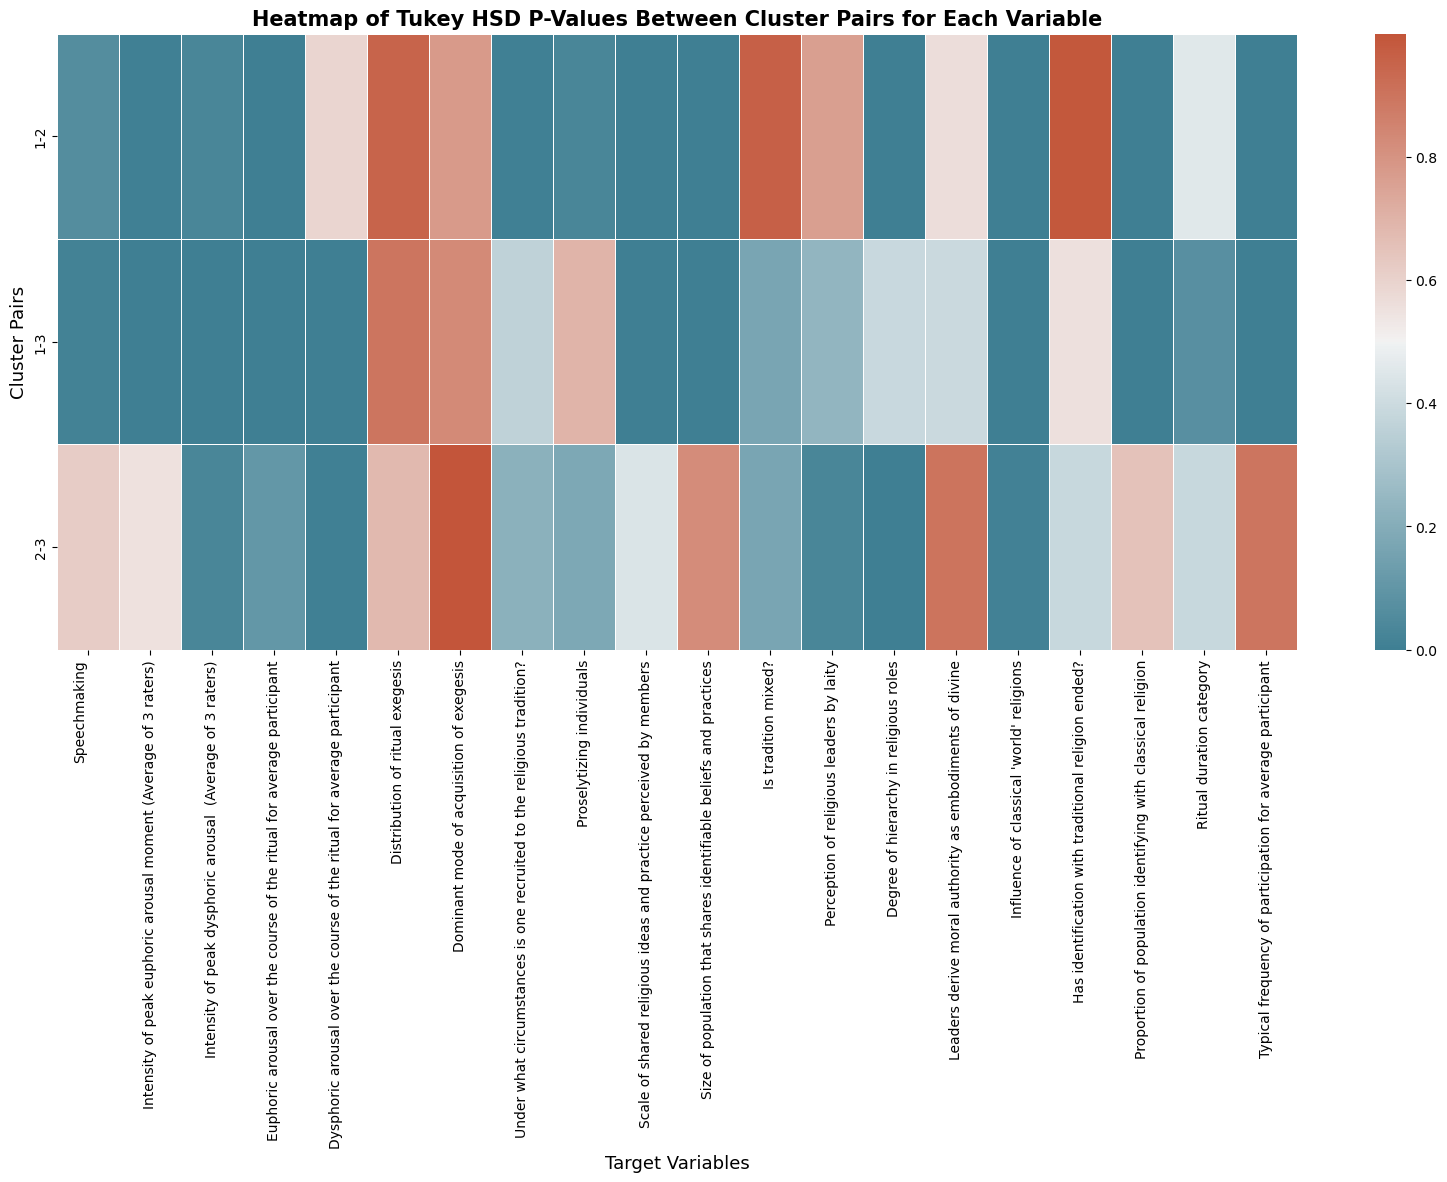

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Specifying specific cluster pairs to include in the heatmap (only unique pairs)
cluster_pairs = [(1, 2), (1, 3), (2, 3)]

# Creating my DataFrame to hold the p-values for selected cluster pairs
p_values_df = pd.DataFrame(index=['1-2', '1-3', '2-3'], columns=target_variables)

# Populating the DataFrame with p-values from Tukey HSD tests for each variable
for variable in target_variables:
    tukey = pairwise_tukeyhsd(endog=data_aggregated[variable],
                              groups=data_aggregated['Cluster'],
                              alpha=0.05)
    for result in tukey.summary().data[1:]:
        group1, group2, _, p_adj, _, _, _ = result
        group1 = int(group1)
        group2 = int(group2)

        # Defining the key based on the order to ensure no reverse duplicates
        key = f"{group1}-{group2}" if (group1, group2) in cluster_pairs else f"{group2}-{group1}"

        # Checking if this key matches one of the keys i'm interested in
        if key in p_values_df.index:
            p_values_df.at[key, variable] = float(p_adj)

# Converting DataFrame to float for better compatibility with heatmap function
p_values_df = p_values_df.astype(float)

# Define the color palette for the heatmap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Generate the heatmap without displaying p-values
plt.figure(figsize=(20, 8))
sns.heatmap(p_values_df, cmap=cmap, annot=False, linewidths=0.5, cbar=True)
plt.title('Heatmap of Tukey HSD P-Values Between Cluster Pairs for Each Variable', fontsize=15, fontweight='bold')
plt.xlabel('Target Variables', fontsize=13)
plt.ylabel('Cluster Pairs', fontsize=13)
plt.show()

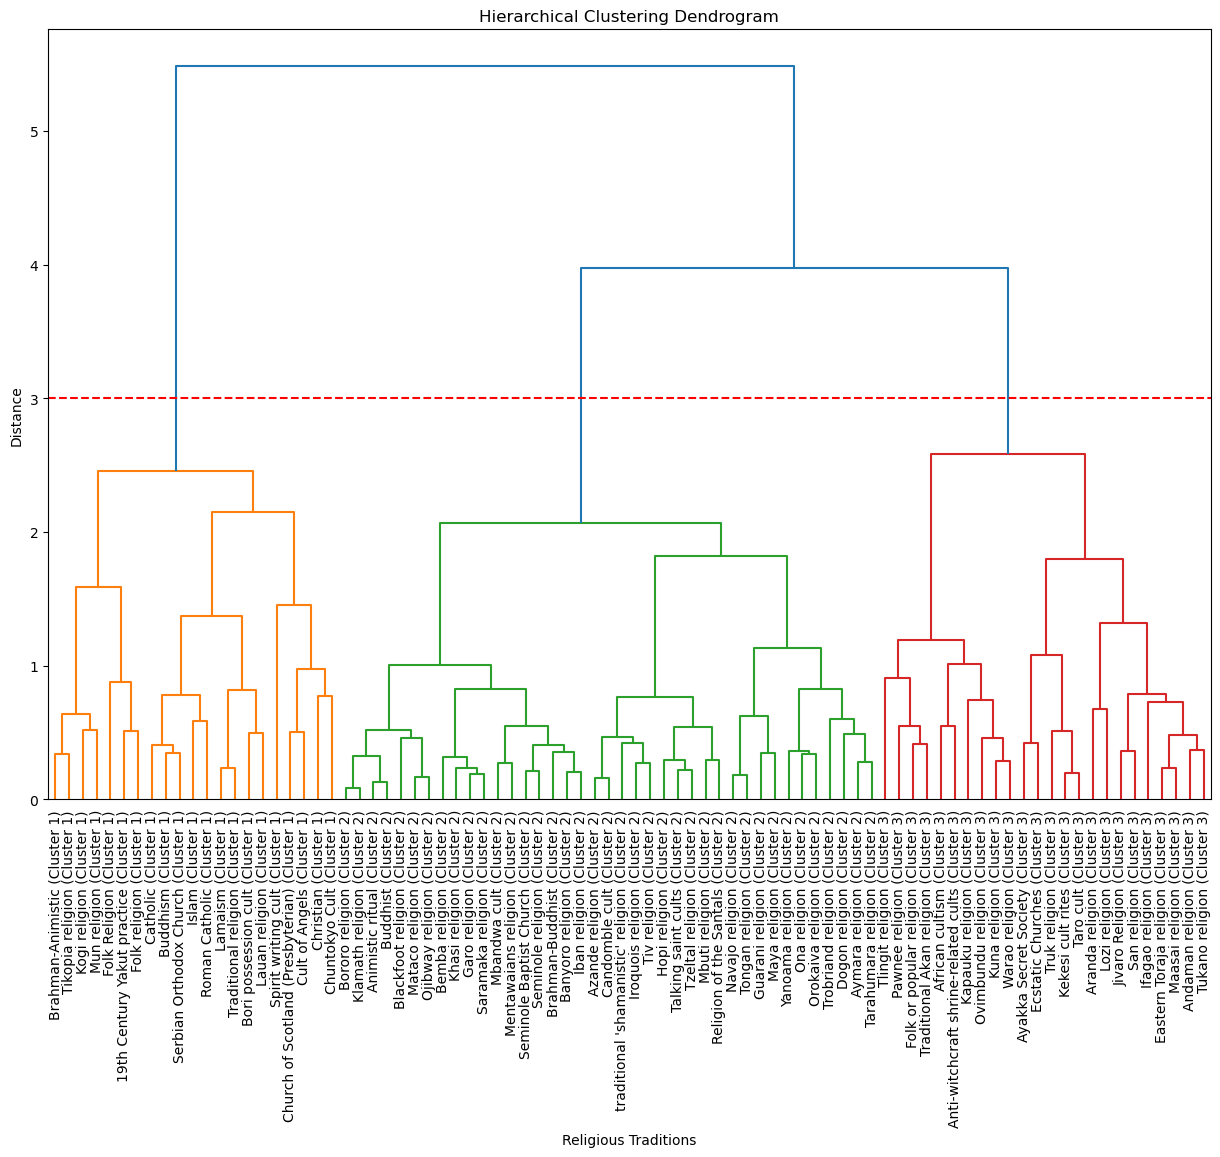

In [20]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, set_link_color_palette

# Plotting the dendrogram with a color threshold
plt.figure(figsize=(15, 10))
dendrogram(linked, labels=labels_with_clusters, leaf_rotation=90, leaf_font_size=10,
           color_threshold=cutoff_distance)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Religious Traditions')
plt.ylabel('Distance')
plt.axhline(y=cutoff_distance, color='r', linestyle='--')
plt.show()

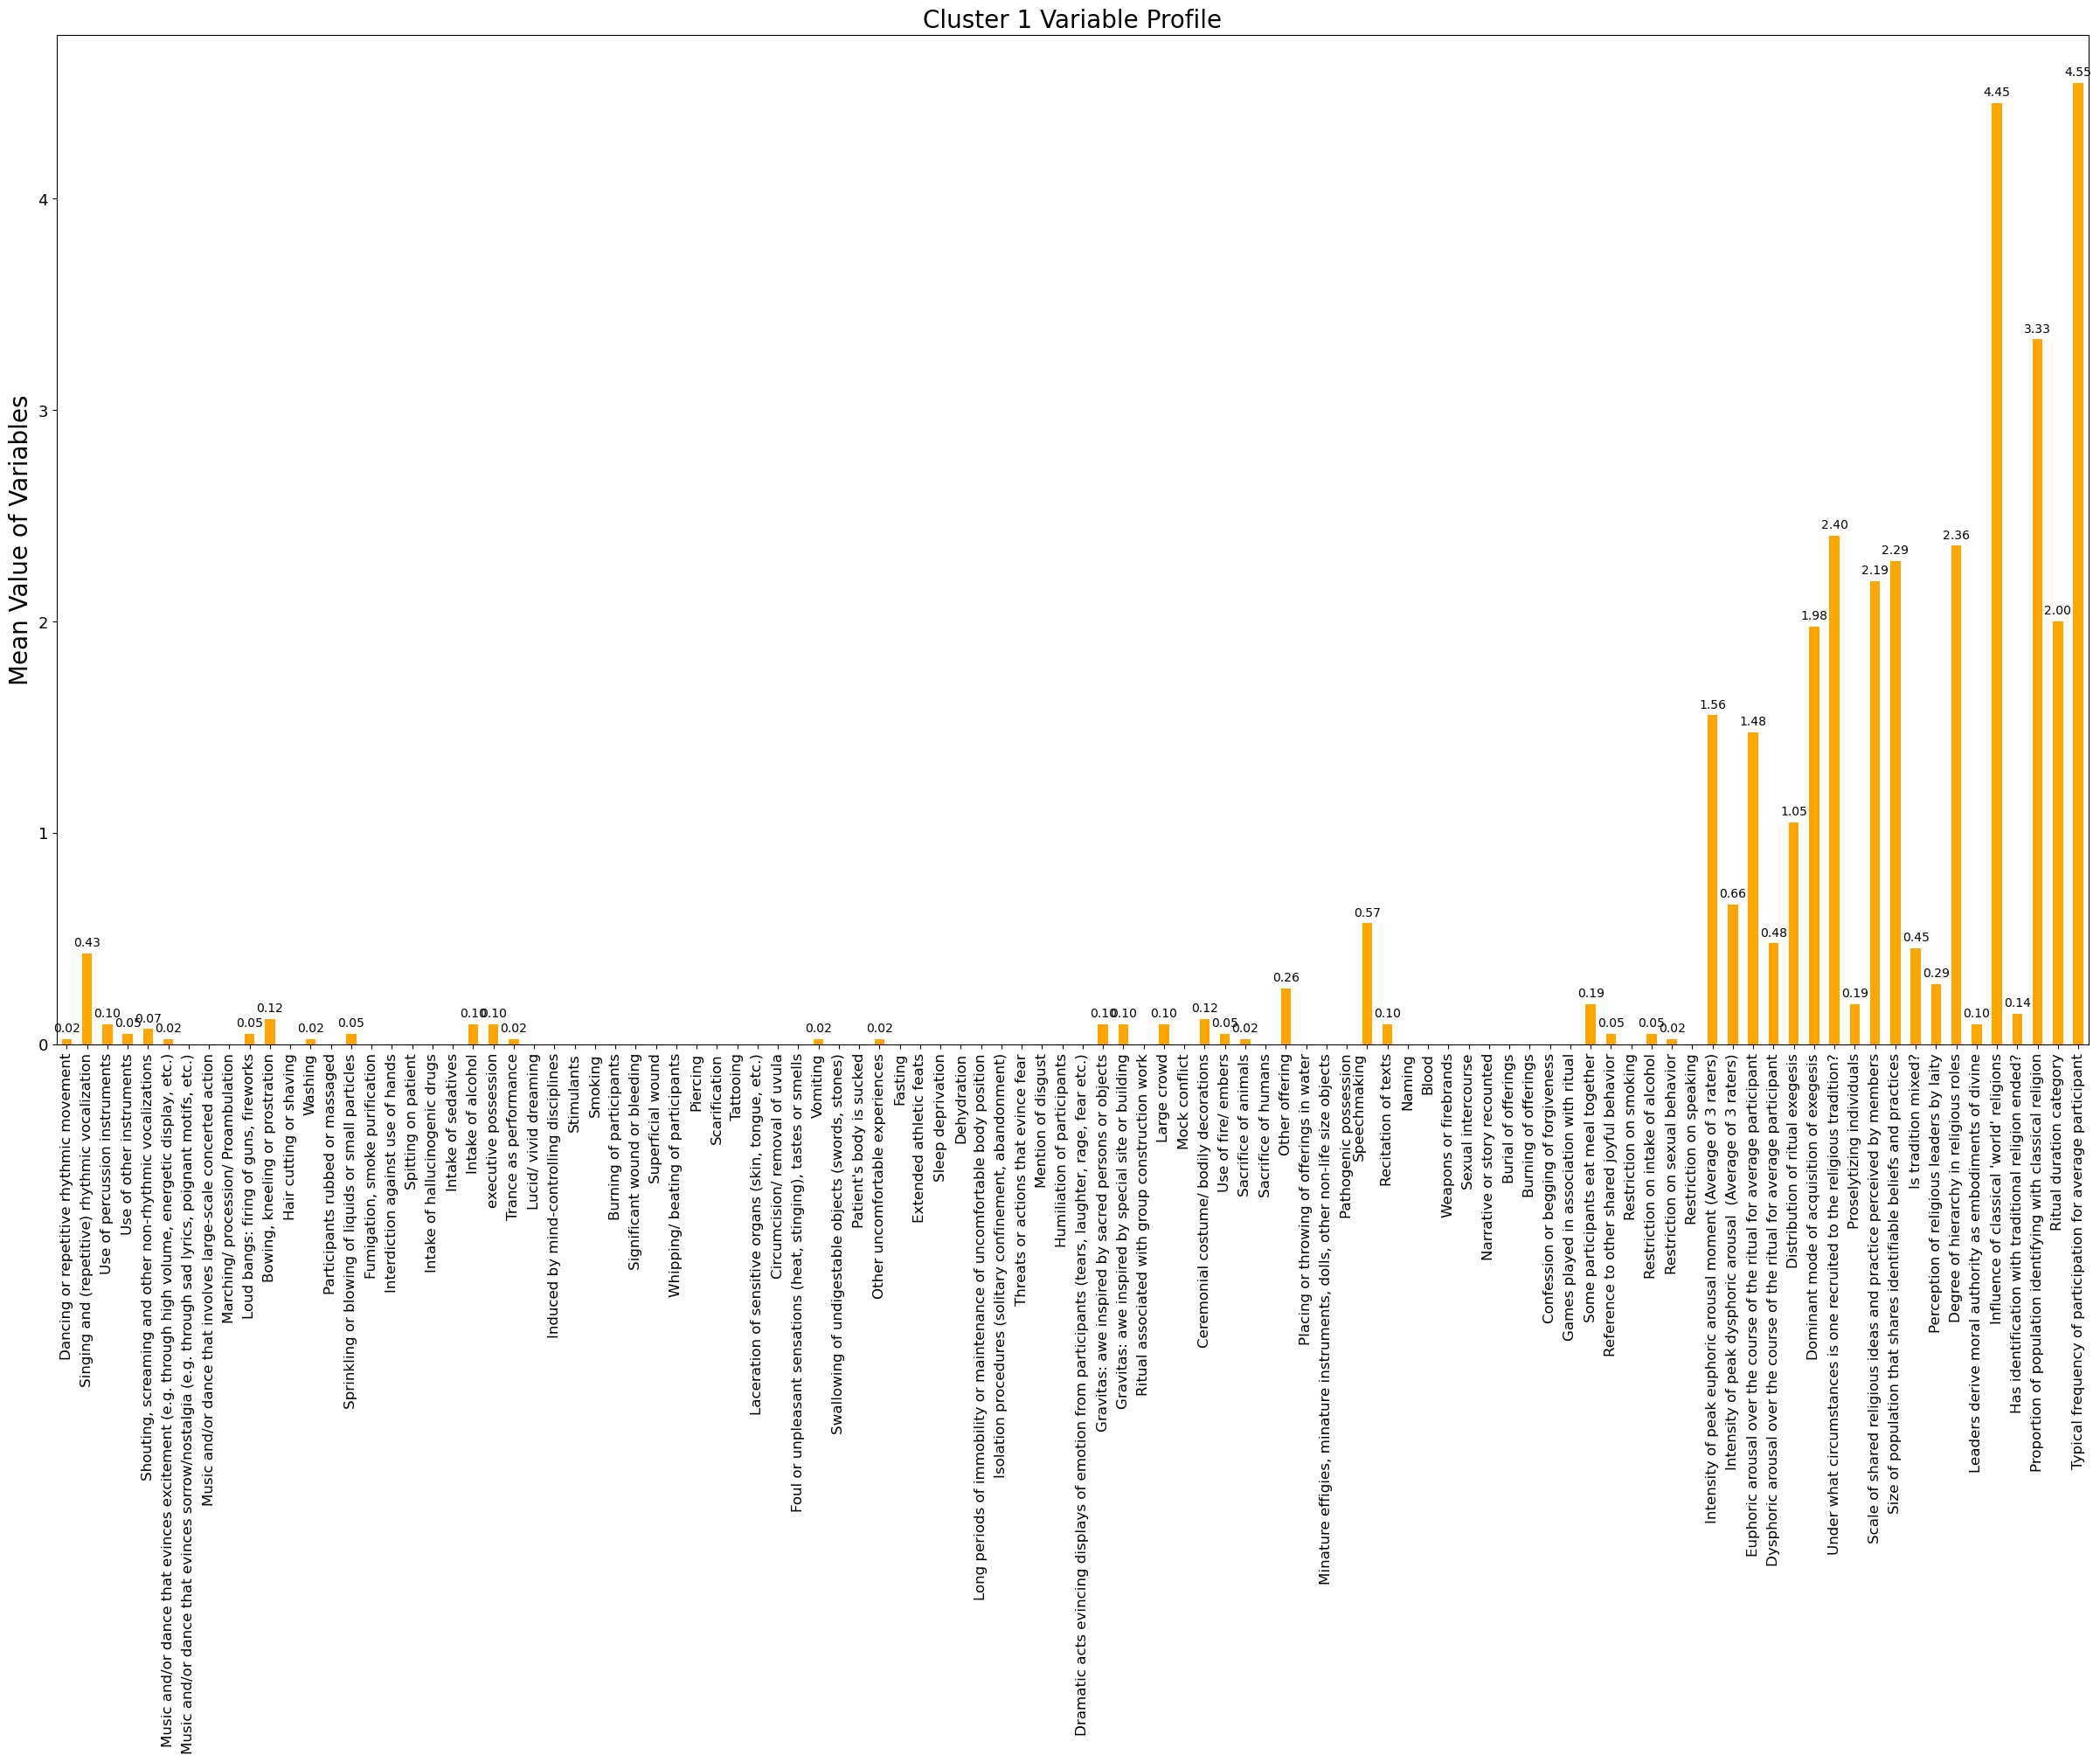

In [21]:
import matplotlib.pyplot as plt

# Calculating the means of each feature within each cluster
cluster_means = data_aggregated.groupby('Cluster').mean()

# Selecting only the data for Cluster 1
cluster_1_means = cluster_means.loc[1]

# Plotting the profile for Cluster 1
plt.figure(figsize=(30, 15))
ax = cluster_1_means.plot(kind='bar', color='orange', fontsize=13) 

bar_label_fontsize = 10

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=bar_label_fontsize)

plt.title('Cluster 1 Variable Profile', fontsize=20) 
plt.ylabel('Mean Value of Variables', fontsize=20) 
plt.xticks(rotation=90, fontsize=12)  
plt.grid(False)
plt.show()

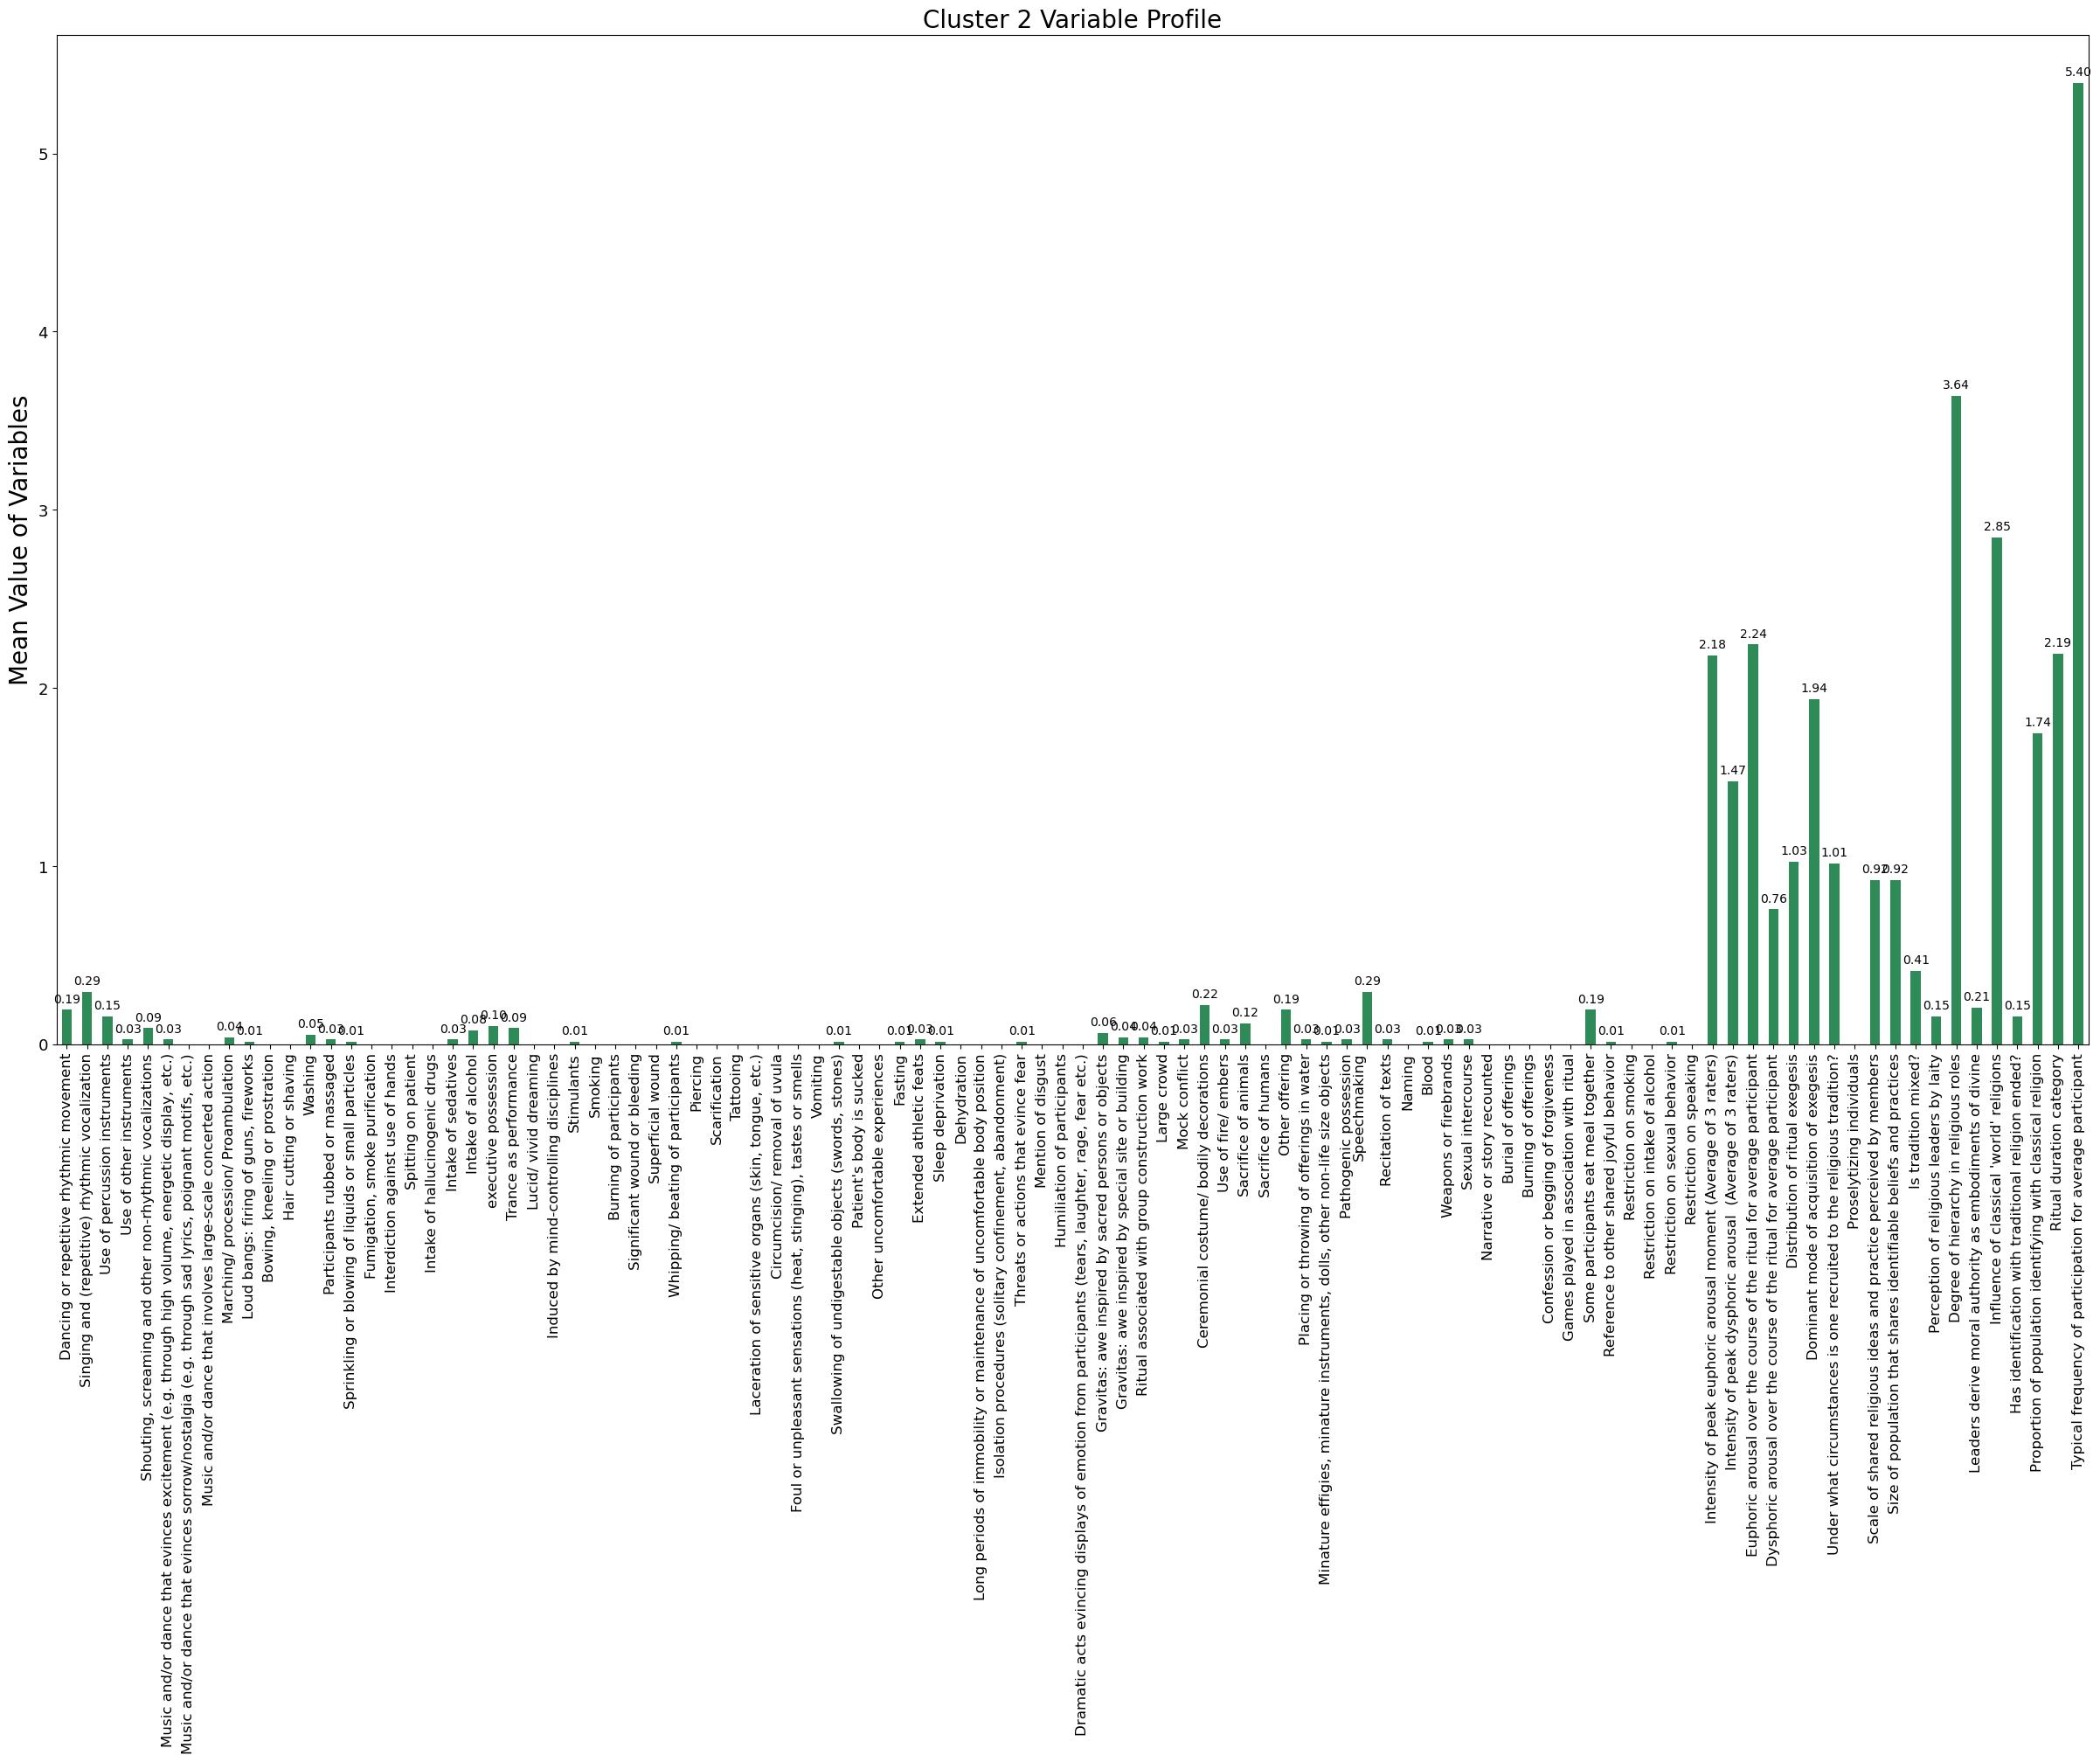

In [22]:
# Selecting only the data for Cluster 2
cluster_2_means = cluster_means.loc[2]

plt.figure(figsize=(30, 15))
ax = cluster_2_means.plot(kind='bar', color='seagreen', fontsize=13)

bar_label_fontsize = 10

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=bar_label_fontsize)

plt.title('Cluster 2 Variable Profile', fontsize=20)
plt.ylabel('Mean Value of Variables', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.grid(False)
plt.show()

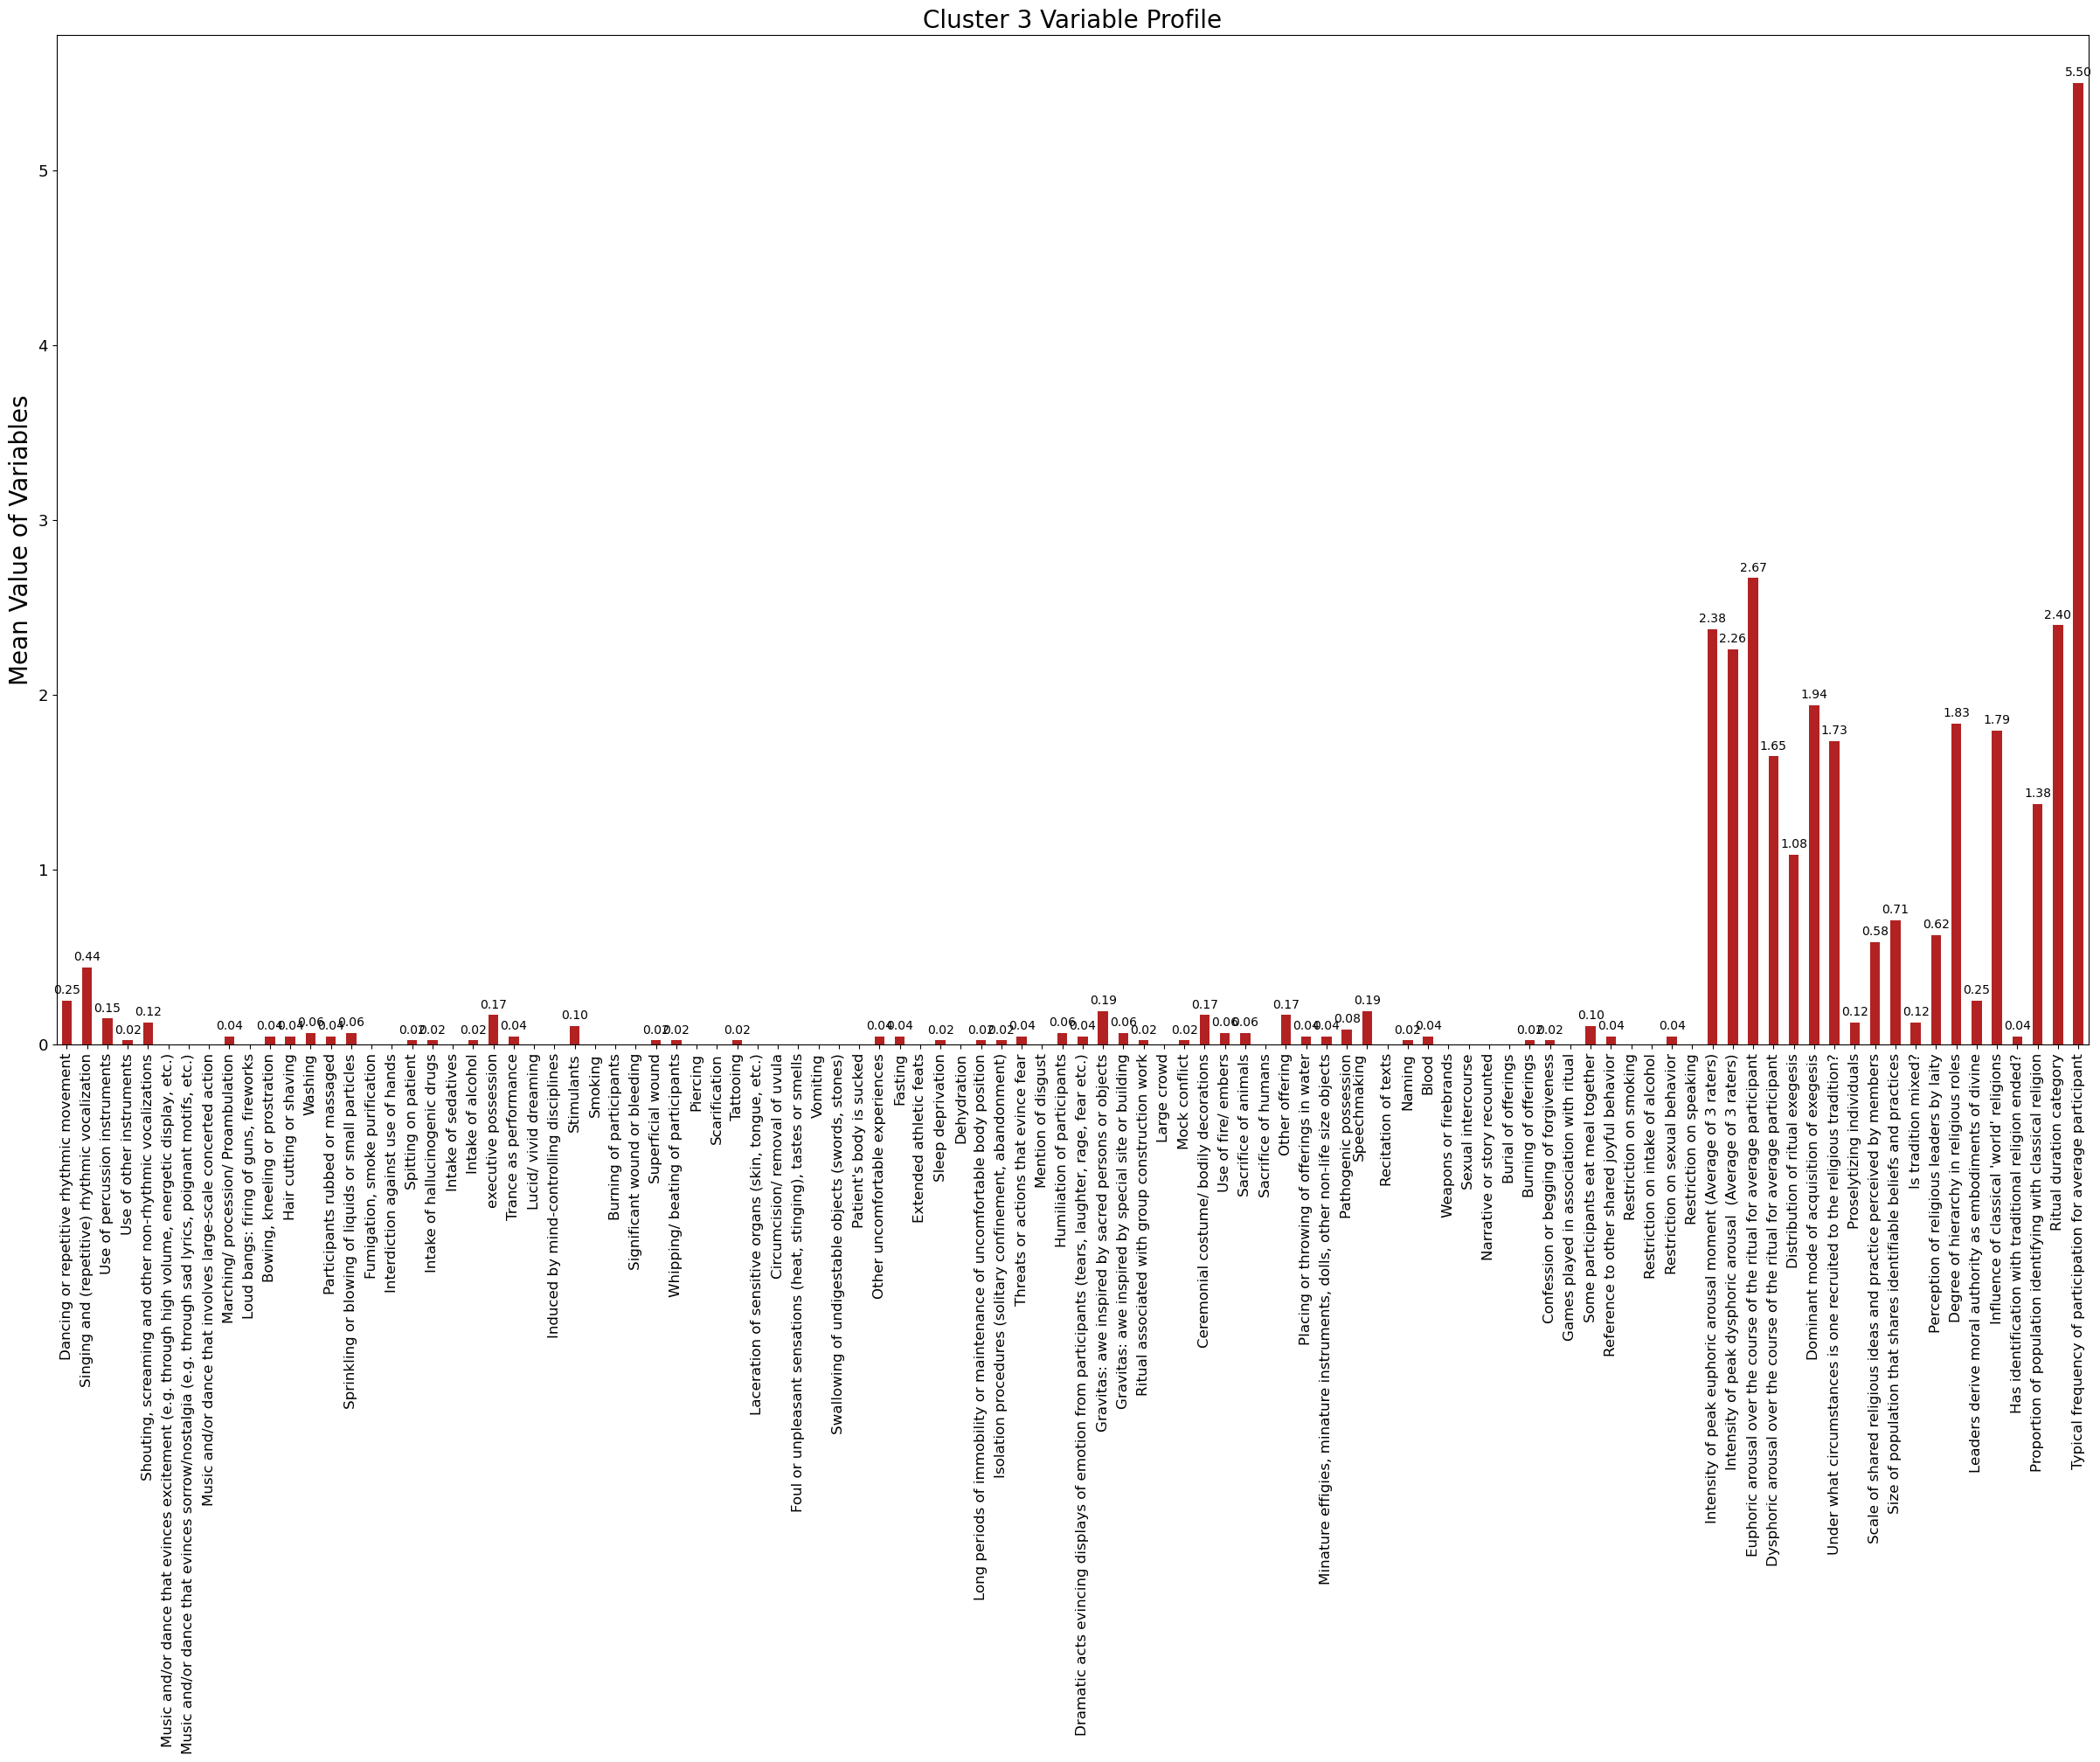

In [23]:
import matplotlib.pyplot as plt

# Selecting only the data for Cluster 3
cluster_3_means = cluster_means.loc[3]

plt.figure(figsize=(30, 15))
ax = cluster_3_means.plot(kind='bar', color='firebrick', fontsize=13)

bar_label_fontsize = 10

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=bar_label_fontsize)

plt.title('Cluster 3 Variable Profile', fontsize=20)
plt.ylabel('Mean Value of Variables', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.grid(False)
plt.show()